Ana Isabel Gonzalez Sahagun

MAIS 5A

Visualización de Datos

Práctica 3 - Visualización con Python

Fecha de entrega: 25/5/2025

## Evolución del nivel educativo en España y su relación con el paro juvenil

En este proyecto se analiza la evolución del nivel educativo en la población española y su posible relación con la tasa de paro juvenil. Para ello, se utilizan tres fuentes de datos:

1. **CSV del INE – Adultos**:  
   El dataset `goblal.csv` contiene datos del nivel de formación alcanzado por la población adulta en España (25 a 64 años y mayores de 65), desglosado por sexo, nivel educativo y año. Los niveles educativos disponibles son:
   - **Nivel 0-2**: Preescolar, primaria y primera etapa de secundaria
   - **Nivel 3-4**: Segunda etapa de secundaria y postsecundaria no superior
   - **Nivel 3-8**: Incluye también educación superior y doctorado
   - **Nivel 5-8**: Exclusivamente educación superior y doctorado  
   
   
   El valor proporcionado en la columna `"Total"` representa el **porcentaje de la población** (según edad, sexo y año) que ha alcanzado ese nivel educativo.  

   El rango temporal disponible es de **2004 a 2023**.

2. **CSV del INE – Jóvenes**:  
   El dataset `juvenil.csv` recoge el porcentaje de jóvenes de **18 a 24 años** por nivel educativo y sexo. Cubre el mismo rango temporal (**2004 a 2023**) y los mismos niveles formativos que el dataset de adultos.
   Este archivo se carga directamente desde un repositorio de GitHub.
3. **Banco Mundial – Tasa de paro juvenil**:  
   A través de la API de `pandas_datareader`, se accede al indicador `SL.UEM.1524.ZS`, que refleja la tasa de desempleo juvenil (% de personas de 15 a 24 años activas que están en paro). Estos datos también abarcan los años de **2004 a 2023** y permiten realizar comparaciones directas con el nivel educativo juvenil.

Este análisis responde a las siguientes preguntas clave:
- ¿Cómo ha evolucionado cada nivel educativo en adultos (25–64 años) en los últimos años?
- ¿Cómo se diferencian los niveles educativos de hombres y mujeres en España en 2023?
- ¿Existe relación entre el nivel educativo de los jóvenes y la tasa de paro juvenil en España?

##### Librerías empleadas

- **Matplotlib:** Visualizaciones básicas y líneas temporales.
- **Seaborn:** Análisis comparativo
- **Ipywidgets:** Interactividad en la selección de niveles formativos.
- **Pandas DataReader:** Acceso a datos del Banco Mundial vía API.


#### Preproceso y comprobaciones de valores nulos

In [1]:
# Instalación condicional de librerías necesarias
import importlib
import subprocess
import sys

def install_if_missing(package_name, import_name=None):
    try:
        importlib.import_module(import_name or package_name)
    except ImportError:
        print(f"Instalando {package_name}...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package_name])

# Lista de librerías necesarias
install_if_missing("pandas")
install_if_missing("matplotlib")
install_if_missing("seaborn")
install_if_missing("ipywidgets")
install_if_missing("pandas_datareader", "pandas_datareader")

In [2]:
# Importación de todas las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display, clear_output
from pandas_datareader import wb

In [3]:
# Cargar el dataset
df_adultos = pd.read_csv("goblal.csv", sep=";")

# Comprobar si hay valores nulos
print("\nComprobación de valores nulos:")
print(df_adultos.isnull().sum())

# Filtrar el dataset para quedarnos solo con el grupo de edad 25 a 64 años
df_adultos = df_adultos[df_adultos["Grupo de edad"] == "De 25 a 64 años"].copy()

# Mostrar valores únicos por columna, excluyendo la columna "Total"
print("Valores únicos por columna:")
for column in df_adultos.columns:
    if column != "Total":
        print(f"{column}: {df_adultos[column].unique()}")



Comprobación de valores nulos:
Grupo de edad         0
Nivel de formación    0
Sexo                  0
periodo               0
Total                 0
dtype: int64
Valores únicos por columna:
Grupo de edad: ['De 25 a 64 años']
Nivel de formación: ['Nivel 0-2' 'Nivel 3-8' 'Nivel 3-4' 'Nivel 5-8']
Sexo: ['Total' 'Hombres' 'Mujeres']
periodo: [2023 2022 2021 2020 2019 2018 2017 2016 2015 2014 2013 2012 2011 2010
 2009 2008 2007 2006 2005 2004]


##### Pregunta 1: ¿Cómo ha evolucionado cada nivel educativo en adultos (25–64 años) en los últimos años?

El objetivo de esta pregunta es analizar cómo han cambiado los niveles educativos en la población adulta de España entre 2004 y 2023.

Se incluye una visualización interactiva en forma de gráfico de líneas, donde el usuario puede seleccionar uno o varios niveles educativos mediante checkboxes. El gráfico se actualiza automáticamente mostrando la evolución temporal de los niveles seleccionados. Este análisis se basa en datos del INE y utiliza `matplotlib` junto con `ipywidgets` para interactividad.

Además, se complementa la visualización con dos gráficos de pastel (pie charts), que permiten comparar la distribución de los niveles educativos en los extremos del periodo analizado: **2004** y **2023**. Estos gráficos muestran la proporción de la población adulta en cada uno de los niveles educativos (0–2, 3–4 y 5–8) en ambos años, ofreciendo una perspectiva clara de la evolución estructural.


In [4]:
# Niveles educativos unicos
niveles_educativos = df_adultos["Nivel de formación"].unique()

# Crear los checkboxes
checkboxes = [widgets.Checkbox(value=True, description=nivel) for nivel in niveles_educativos]
checkboxes_box = widgets.VBox(checkboxes)

# Actualizar el grafico
def actualizar_grafico(*args):
    clear_output(wait=True)
    display(checkboxes_box)

    niveles_seleccionados = [cb.description for cb in checkboxes if cb.value]

    # Filtrar
    df_filtrado = df_adultos[
        (df_adultos["Nivel de formación"].isin(niveles_seleccionados)) &
        (df_adultos["Sexo"] == "Total")
    ].copy()

    # Convertir columna "Total" a float
    df_filtrado["Total"] = df_filtrado["Total"].str.replace(",", ".").astype(float)

    # Agrupar por año y nivel de formación
    df_grouped = df_filtrado.groupby(["periodo", "Nivel de formación"])["Total"].mean().unstack()

    
    plt.figure(figsize=(12, 6))
    for nivel in niveles_seleccionados:
        plt.plot(df_grouped.index, df_grouped[nivel], label=nivel)

    plt.title("Evolución del nivel educativo en adultos (25–64 años)")
    plt.xlabel("Año")
    plt.ylabel("Porcentaje de población")
    plt.xticks(df_grouped.index.astype(int))  
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

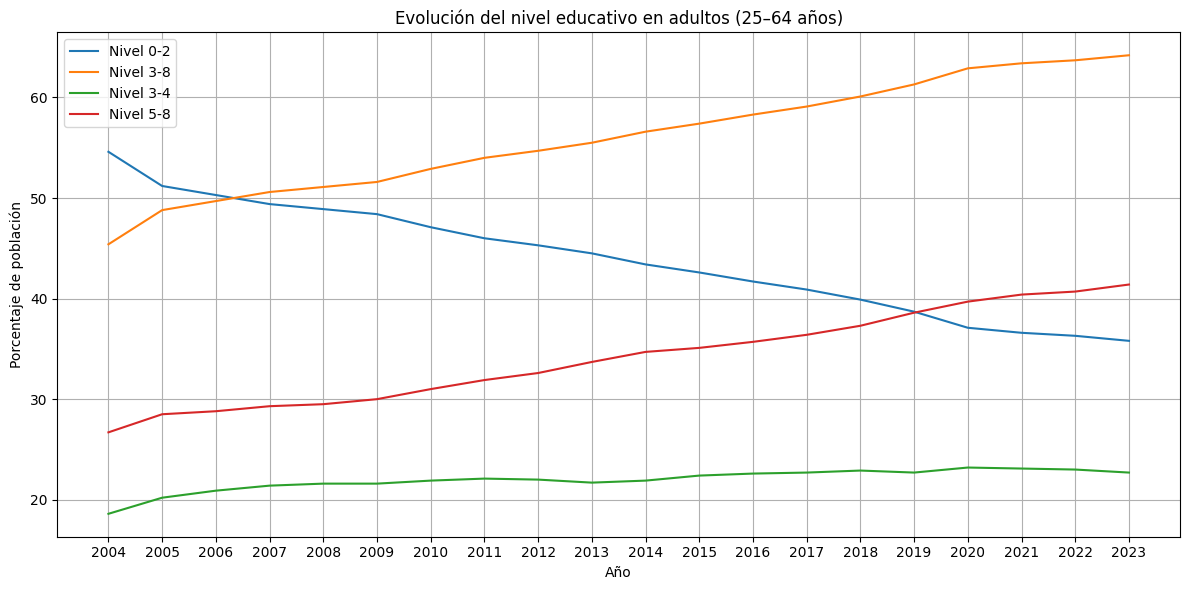

In [5]:
# Asociar función a cada checkbox
for cb in checkboxes:
    cb.observe(actualizar_grafico, 'value')

# Mostrar checkboxes y grafico inicial
display(checkboxes_box)
actualizar_grafico()

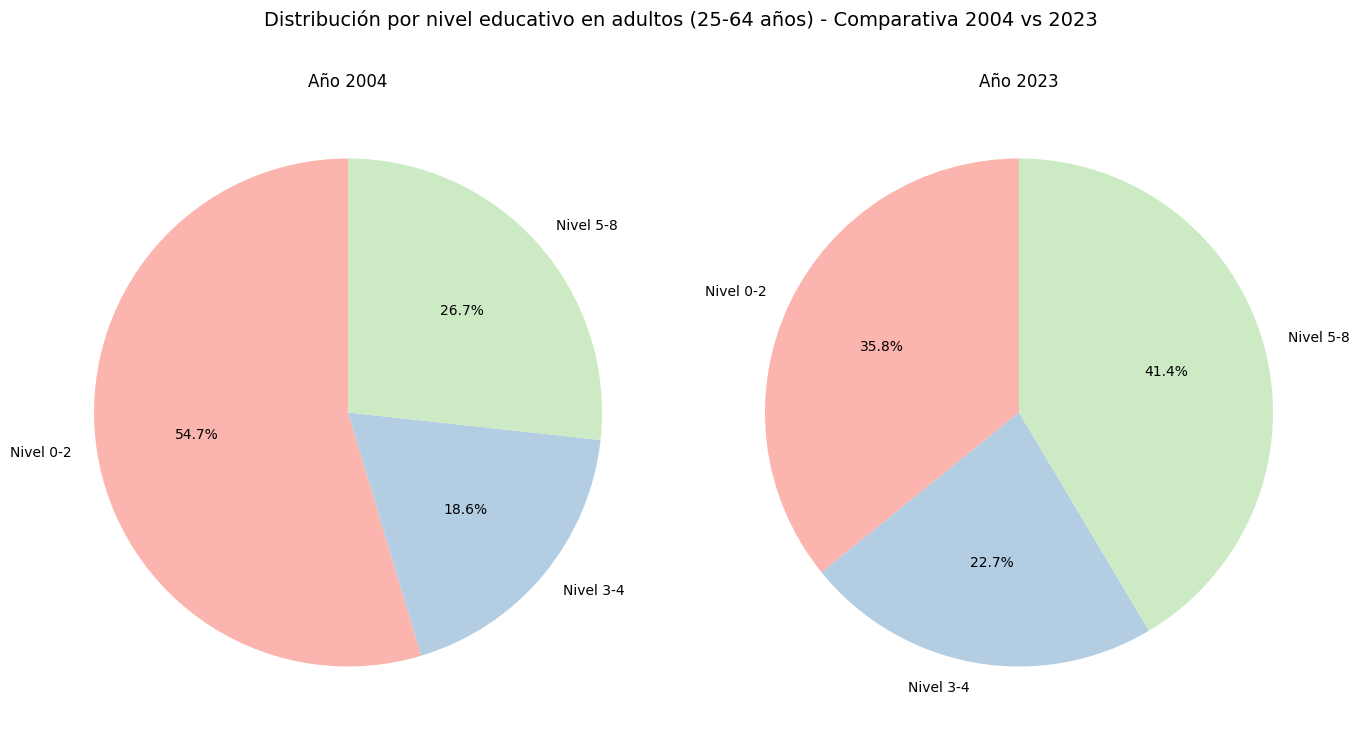

In [6]:
# Filtrar por años y sexo "Total"
df_pie = df_adultos[
    (df_adultos["periodo"].isin([2004, 2023])) &
    (df_adultos["Sexo"] == "Total")
].copy()

# Convertir "Total" a int
df_pie["Total"] = df_pie["Total"].str.replace(",", ".").astype(float)

# Ordenar los niveles educativos
orden = ["Nivel 0-2", "Nivel 3-4", "Nivel 5-8"]

# Crear subgráficos
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

for i, year in enumerate([2004, 2023]):
    datos = df_pie[(df_pie["periodo"] == year) & df_pie["Nivel de formación"].isin(orden)]
    datos = datos.set_index("Nivel de formación").loc[orden].reset_index()

    axes[i].pie(
        datos["Total"],
        labels=datos["Nivel de formación"],
        autopct="%1.1f%%",
        startangle=90,
        colors=plt.cm.Pastel1.colors
    )
    axes[i].set_title(f"Año {year}", fontsize=12)

# Añadir separación vertical
plt.suptitle("Distribución por nivel educativo en adultos (25-64 años) - Comparativa 2004 vs 2023", fontsize=14, y=1.05)

plt.tight_layout()
plt.show()

##### Pregunta 2: ¿Cómo se diferencian los niveles educativos de hombres y mujeres en España en 2023?

Este gráfico de barras permite comparar directamente la distribución de la población masculina y femenina entre los diferentes niveles educativos en el año 2023.

Se representan dos barras para cada nivel educativo:
- Una barra azul para los hombres.
- Una barra rosa para las mujeres.

De esta forma, es posible observar las diferencias entre ambos sexos en cada nivel formativo, destacando posibles desigualdades.

El gráfico utiliza `seaborn`


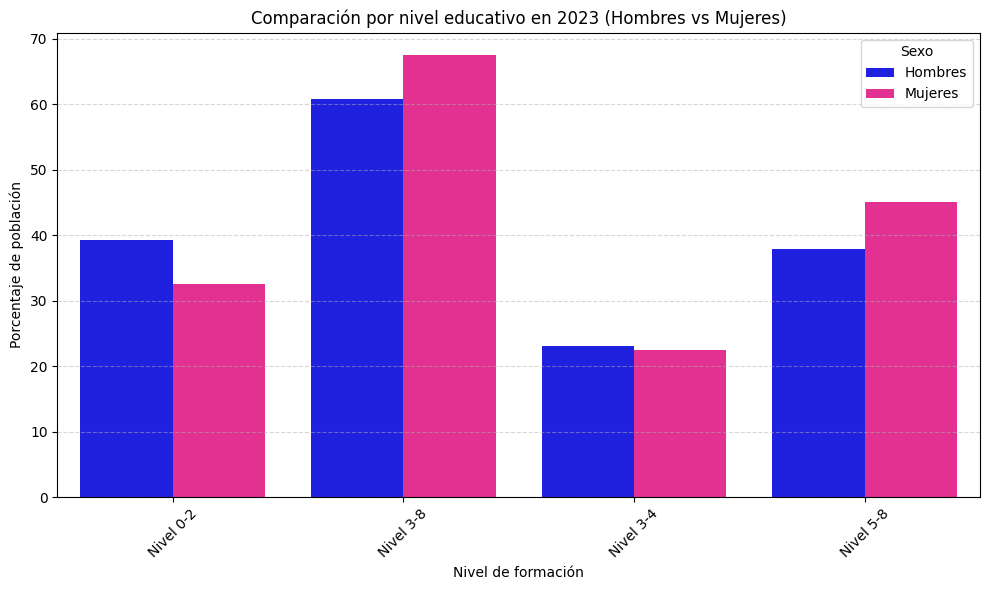

In [7]:
# Filtrar para 2023 y sexo
df_2023 = df_adultos[
    (df_adultos["periodo"] == 2023) &
    (df_adultos["Sexo"] != "Total")
].copy()

# Convertir valores a float
df_2023["Total"] = df_2023["Total"].str.replace(",", ".").astype(float)

# Crear gráfico con seaborn
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_2023,
    x="Nivel de formación",
    y="Total",
    hue="Sexo",
    palette={"Hombres": "blue", "Mujeres": "deeppink"}
)

plt.title("Comparación por nivel educativo en 2023 (Hombres vs Mujeres)")
plt.xlabel("Nivel de formación")
plt.ylabel("Porcentaje de población")
plt.xticks(rotation=45)
plt.grid(True, axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

##### Pregunta 3: ¿Existe relación entre el nivel educativo de los jóvenes y la tasa de paro juvenil en España?

En esta última sección se analiza si la proporción de jóvenes con bajo nivel educativo guarda alguna relación con la tasa de paro juvenil en España entre los años 2004 y 2023.

Se han utilizado dos fuentes de datos:
- **INE (`juvenil.csv`)**: contiene el porcentaje de jóvenes de 18 a 24 años clasificados por nivel educativo (0–2, 3–4, 5–8). Este archivo se carga directamente desde un repositorio de GitHub.
- **Banco Mundial (`pandas_datareader`)**: proporciona la tasa de desempleo juvenil (15–24 años) a través del indicador `SL.UEM.1524.ZS`.

Se presentan dos visualizaciones:
1. Un **gráfico de barras apiladas** que muestra cómo ha evolucionado la distribución de los niveles educativos entre los jóvenes a lo largo del tiempo.
2. Un **gráfico de línea** que representa la evolución de la tasa de paro juvenil en el mismo periodo.


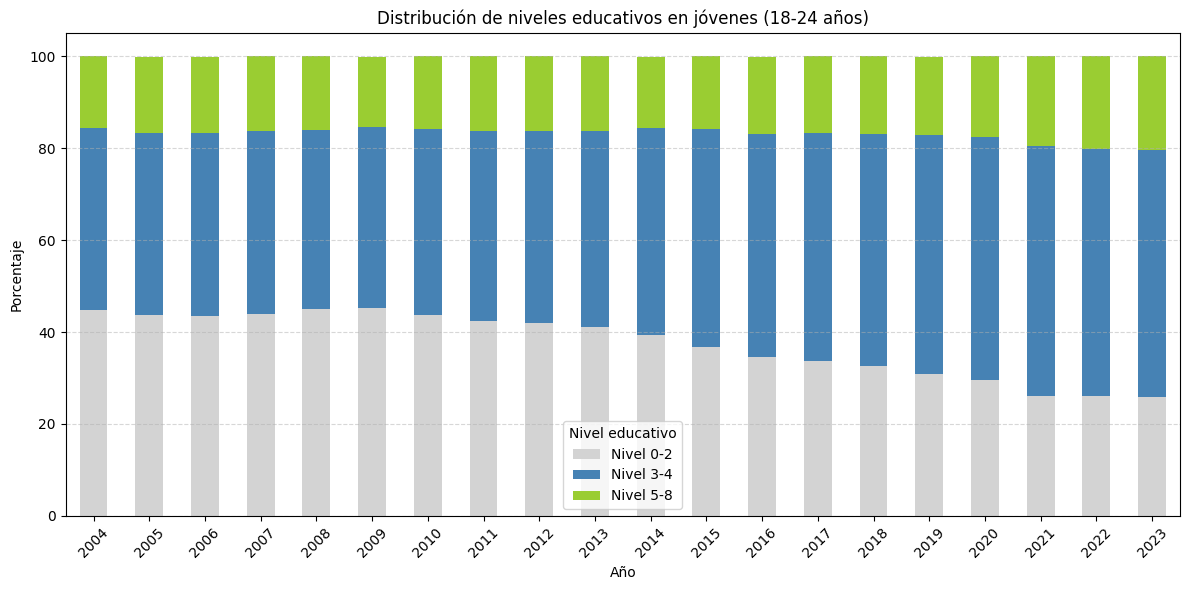

In [8]:
# Cargar datos directamente desde GitHub (raw)
url = "https://raw.githubusercontent.com/anaigs/VIDA_python/main/juvenil.csv"
df_juv = pd.read_csv(url, sep=";")

# Filtrar por Sexo Total y convertir porcentaje
df_juv = df_juv[df_juv["Sexo"] == "Total"].copy()
df_juv["Total"] = df_juv["Total"].str.replace(",", ".").astype(float)

# Pivotear datos para barras apiladas
df_pivot = df_juv.pivot(index="periodo", columns="Nivel de educación", values="Total")
df_pivot = df_pivot[["Nivel 0-2", "Nivel 3-4", "Nivel 5-8"]]  # Orden

# Crear gráfico de barras apiladas
df_pivot = df_pivot.sort_index()
df_pivot.plot(kind="bar", stacked=True, figsize=(12, 6), color=["lightgray", "steelblue", "yellowgreen"])

plt.title("Distribución de niveles educativos en jóvenes (18-24 años)")
plt.xlabel("Año")
plt.ylabel("Porcentaje")
plt.legend(title="Nivel educativo")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

C:\Users\anaig\AppData\Local\Temp\ipykernel_7124\3774996525.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  paro_juv = wb.download(indicator="SL.UEM.1524.ZS", country="ES", start=2004, end=2023)


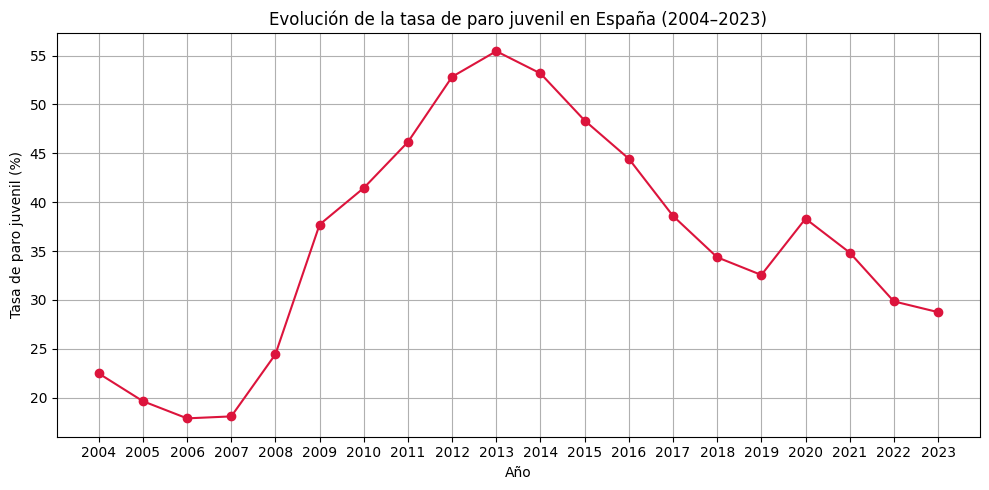

In [9]:
# Descargar tasa de paro juvenil desde el Banco Mundial
paro_juv = wb.download(indicator="SL.UEM.1524.ZS", country="ES", start=2004, end=2023)
paro_juv = paro_juv.reset_index()
paro_juv = paro_juv.rename(columns={"year": "Año", "SL.UEM.1524.ZS": "Tasa de paro juvenil (%)"})
paro_juv = paro_juv.sort_values("Año")

# Gráfico de línea
plt.figure(figsize=(10, 5))
plt.plot(paro_juv["Año"], paro_juv["Tasa de paro juvenil (%)"], marker="o", color="crimson")

plt.title("Evolución de la tasa de paro juvenil en España (2004–2023)")
plt.xlabel("Año")
plt.ylabel("Tasa de paro juvenil (%)")
plt.grid(True)
plt.xticks(paro_juv["Año"])
plt.tight_layout()
plt.show()


### Conclusiones

A través del análisis de los distintos gráficos, se puede observar una clara evolución positiva en el nivel educativo de la población española entre 2004 y 2023. En los adultos (25–64 años), los niveles más bajos (0–2) han disminuido considerablemente, mientras que los estudios superiores (nivel 5–8) han crecido de forma constante.

También se aprecian diferencias de género: en 2023, las mujeres presentan mayor proporción en los niveles educativos altos, mientras que los hombres predominan en los niveles más bajos.

En cuanto a la población joven (18–24 años), la mejora educativa también es evidente, aunque persiste un porcentaje significativo en niveles bajos. La tasa de paro juvenil, aunque ha descendido desde su pico en 2013, sigue siendo elevada y su evolución no siempre va en paralelo al nivel educativo, lo que sugiere que existen otros factores estructurales en el desempleo juvenil.

En conjunto, los datos reflejan una tendencia positiva en la formación, pero también ponen de manifiesto desafíos pendientes en la inserción laboral de los jóvenes.
